In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [27]:
df = pd.read_csv('C:/data_science/experiment_dataset.csv')
print(df) #Loading data into df

#Here I want to check about whether it conforms to the normal distribution. And then I can use it to t test.
u = df['Time Spent'].mean()
u1 = df['CTR'].mean()
std = df['Time Spent'].std()
std1 = df['CTR'].std()
print(stats.kstest(df['Time Spent'],'norm', (u,std)))
print(stats.kstest(df['CTR'],'norm', (u1,std1)))
#If the pvalue is over 0.05 then it is the normal distribution.

     Unnamed: 0  Age   Location   Device    Variant  Time Spent       CTR
0             0   62  Location2  Device2    Control   13.928669  0.084776
1             1   18  Location1  Device1  Variant B   11.310518  0.096859
2             2   21  Location2  Device1  Variant B   24.842100  0.097630
3             3   21  Location1  Device3  Variant B   20.061300  0.109783
4             4   57  Location1  Device2  Variant B   34.495503  0.068579
..          ...  ...        ...      ...        ...         ...       ...
995         995   39  Location2  Device2  Variant B   17.252030  0.092211
996         996   38  Location3  Device2    Control   30.075898  0.078151
997         997   60  Location2  Device3    Control   31.929223  0.125213
998         998   35  Location2  Device2  Variant B   14.680299  0.095423
999         999   55  Location1  Device1  Variant B   25.803169  0.166688

[1000 rows x 7 columns]
KstestResult(statistic=0.016460729559185983, pvalue=0.9451102891235701, statistic_locat

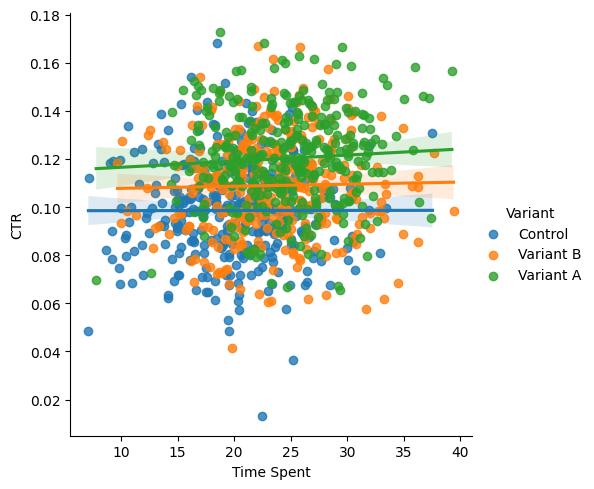

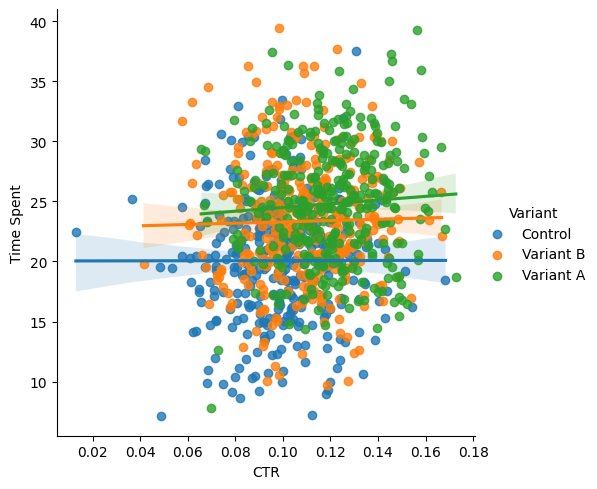

In [26]:
#Because I want to know which feature will cause the increase of 'Time Spent' and "CTR", I decided to 
#compare the feature of 'Variant'. Since 'Location' and 'Device' might not be the main reason to attract
#users to spend more time on the application, and view different parts of the feature.
 
sns.lmplot(data = df, x='Time Spent', y='CTR', hue='Variant')
plt.show() #Showing linear regression fits that is under different features.
sns.lmplot(data = df, y='Time Spent', x='CTR', hue='Variant')
plt.show() #Showing linear regression fits that is under different features.

#Here we can see that the feature 'Variant A' would be the feature that cause the most increase of CTR and Time spent. 
#Because if "Time Spent" is used as the independent variable and "CTR" as the dependent variable, 
# the 'CTR' of 'Variant A' increase as the time spent increase through the comparison as the 'Control'. 
# And if we switch the independent and dependent variables,
# we can get the same result. Although the trend of the feture 'Variant B' is similar as 'Variant A', the increase is much slow.

In [36]:
#Using t test to find the significant difference between each variants.
va_control= df[df['Variant'] == 'Control']['CTR']
va_A = df[df['Variant'] == 'Variant A']['CTR']
t_stat, p_val_A = stats.ttest_ind(va_control, va_A)
#Checking the P value between Control group and Variant A 
print('P_Value (Comparison with control group and Variant A group):', p_val_A)

va_B = df[df['Variant'] == 'Variant B']['CTR']
t_stat, p_val_B = stats.ttest_ind(va_control, va_B)
#Checking the P value between Control group and Variant B 
print('P_Value (Comparison with control group and Variant B group):', p_val_B)

t_stat, p_val_AB = stats.ttest_ind(va_A, va_B)
#Checking the P value between Variant B and Variant A 
print('P_Value (Comparison with Variant A group and Variant B group):', p_val_AB)

#Based on the CTR, we can see that both Variant A and Variant B are statistically significantly different than the Control group!
#And also, Variant A and Variant B are significantly different than each other.
# This means that both variant A or B should yield good results after the implementation. But there exist a variant perform better.

print(df.groupby('Variant')[['CTR']].mean())
#As we can see that both variants perform better than control group. And the mean value of Variant A is slightly better than Variant B.
#That means Variant A will be the one perform the best.


P_Value (Comparison with control group and Variant A group): 1.9602781373243157e-38
P_Value (Comparison with control group and Variant B group): 1.8743198199982106e-10
P_Value (Comparison with Variant A group and Variant B group): 3.587180487986577e-12
                CTR
Variant            
Control    0.098554
Variant A  0.120269
Variant B  0.108933


In [37]:
#Using t test to find the significant difference between each variants.
va_control= df[df['Variant'] == 'Control']['Time Spent']
va_A = df[df['Variant'] == 'Variant A']['Time Spent']
t_stat, p_val_A = stats.ttest_ind(va_control, va_A)
#Checking the P value between Control group and Variant A 
print('P_Value (Comparison with control group and Variant A group):', p_val_A)

va_B = df[df['Variant'] == 'Variant B']['Time Spent']
t_stat, p_val_B = stats.ttest_ind(va_control, va_B)
#Checking the P value between Control group and Variant B 
print('P_Value (Comparison with control group and Variant B group):', p_val_B)

t_stat, p_val_AB = stats.ttest_ind(va_A, va_B)
#Checking the P value between Variant B and Variant A 
print('P_Value (Comparison with Variant A group and Variant B group):', p_val_AB)

#Based on the Time Spent, we can see that both Variant A and Variant B are statistically significantly different than the Control group!
#And also, Variant A and Variant B are significantly different than each other.
# This means that the result is similar to the analysis we did as above. All variants perform well post-implementation, but there is a better one.

print(df.groupby('Variant')[['Time Spent']].mean())
#As we can see that both variants perform better than control group. And the mean value of Variant A is slightly better than Variant B.
#That means Variant A will be the one perform the best.

P_Value (Comparison with control group and Variant A group): 8.488565644996449e-31
P_Value (Comparison with control group and Variant B group): 1.496358076285182e-15
P_Value (Comparison with Variant A group and Variant B group): 0.0002534771014765265
           Time Spent
Variant              
Control     20.070781
Variant A   24.805547
Variant B   23.343783


Q3:
As we can see the results above. We can conclude that the engineering team should deploy the feature Variant A. Based on the CTR and Time Spent, Variant A could attract users more than the others, which means that it is benefit us in term of business. So, in our case, we want our users to be able to spend as much time as possible on our application and choosing development variable A would be a good idea.

Q4:\
1, Inviting few competent people to conduct internal tests (around half a month).\
2, Publicity and short-term internal testing of variant A to part of users. (around 2 months). \
3, Collecting and analyzing feedbacks from both groups (around half a month).\
4, Based on the feedbacks and usage data from both groups, identifying the intended outcome and optimizing the user experiences (around a month).\
5, Repeating step 2 and 3 again. Ensuring the outcomes are as expected (around 3 months).\
6, Officially lauching the variant A (a week). Ongoing data and feedback collection. Based on these, optimizing the user experiences.